In [43]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Import supplementary visualization code visuals.py
import visuals as vs

%matplotlib inline

# Path of the data
in_file = r'criminal_train.csv'

# Reading data in a pandas DataFrame
full_data = pd.read_csv(in_file)

# Displaying first 5 rows
full_data.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


In [44]:
corr_data = full_data.corr(method='pearson', min_periods=1)

corr_data.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
PERID,1.000000,-0.000370,-0.004661,0.004180,-0.003580,-0.001641,-0.004493,-0.002755,-0.003110,-0.010388,...,-0.007988,-0.008000,0.002207,-0.002366,0.002922,0.003338,-0.003969,-0.008561,0.003490,-0.000396
IFATHER,-0.000370,1.000000,0.292649,-0.316373,0.020092,-0.456600,0.015866,0.123218,-0.018685,0.001902,...,0.001188,0.003782,-0.008986,-0.005727,0.008026,0.009040,0.271299,0.024717,0.001650,-0.049935
NRCH17_2,-0.004661,0.292649,1.000000,0.361402,-0.046243,0.528787,-0.052374,-0.138690,-0.052981,0.050937,...,-0.011360,-0.011255,0.020646,0.024687,-0.006669,-0.006760,0.002526,0.011120,-0.001137,-0.091212
IRHHSIZ2,0.004180,-0.316373,0.361402,1.000000,0.000186,0.760678,0.037206,-0.132342,0.044797,-0.081839,...,0.002691,0.000974,-0.031969,-0.030267,-0.020827,-0.020117,-0.167459,0.020170,-0.001951,-0.068281
IIHHSIZ2,-0.003580,0.020092,-0.046243,0.000186,1.000000,-0.000182,0.496536,0.010129,0.392551,0.012797,...,0.256990,0.257686,0.005539,0.002939,0.033680,0.033567,0.006109,0.215724,0.008187,0.009238


In [45]:
#Optimize for deselecting rows that have correlation coefficient of 0
actual_row = []

for row in corr_data:
    if corr_data['Criminal'][row] > 0:
        actual_row.append(row)
        
actual_data = full_data[actual_row]

actual_data

,IIHHSIZ2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,MEDICARE,CAIDCHIP,CHAMPUS,PRVHLTIN,HLTINNOS,...,GOVTPROG,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,Criminal
0,1,1,1,1,99,2,1,2,2,99,...,1,1,2,1,1,2,2,3884.805998,40026,0
1,1,1,1,1,99,2,2,2,1,99,...,1,2,2,2,3,2,2,1627.108106,40015,1
2,1,1,1,1,99,2,1,2,2,99,...,1,2,2,2,3,2,2,4344.957980,40024,0
3,1,1,1,1,99,2,2,2,1,99,...,2,2,2,1,1,2,2,792.521931,40027,0
4,1,1,1,1,99,2,1,2,2,99,...,1,2,2,2,2,2,2,1518.118526,40001,0
5,1,1,1,1,99,2,2,2,2,2,...,2,2,2,2,3,2,2,9129.229124,40035,0
6,1,1,1,1,99,2,1,2,2,99,...,1,2,2,2,2,2,2,6561.895497,40043,0
7,1,1,1,1,99,2,2,2,2,2,...,1,2,2,2,2,2,2,3341.718873,40006,0
8,1,1,1,1,99,2,2,2,2,2,...,2,2,2,2,1,2,2,3384.147888,40021,0
9,1,1,2,1,99,1,2,2,1,99,...,2,2,2,1,1,2,2,2636.943978,40006,0


In [4]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the data into features and target label
criminal_raw = actual_data['Criminal']
features_raw = actual_data.drop('Criminal', axis = 1)

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_raw, criminal_raw, test_size = 0.3, random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 32002 samples.
Testing set has 13716 samples.


In [5]:
TP = np.sum(income_raw) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
                    # encoded to numerical values done in the data preprocessing step.
FP = income_raw.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# Calculate accuracy, precision and recall
accuracy = TP / (TP + FP)
recall = 1
precision = TP / (TP + FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Print the results 
print('Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]'.format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.0694, F-score: 0.0853]


In [6]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5, average='weighted')
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='weighted')
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

LogisticRegression trained on 320 samples.
LogisticRegression trained on 3200 samples.


/home/shagun/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LogisticRegression trained on 32002 samples.
KNeighborsClassifier trained on 320 samples.
KNeighborsClassifier trained on 3200 samples.
KNeighborsClassifier trained on 32002 samples.
GradientBoostingClassifier trained on 320 samples.
GradientBoostingClassifier trained on 3200 samples.
GradientBoostingClassifier trained on 32002 samples.


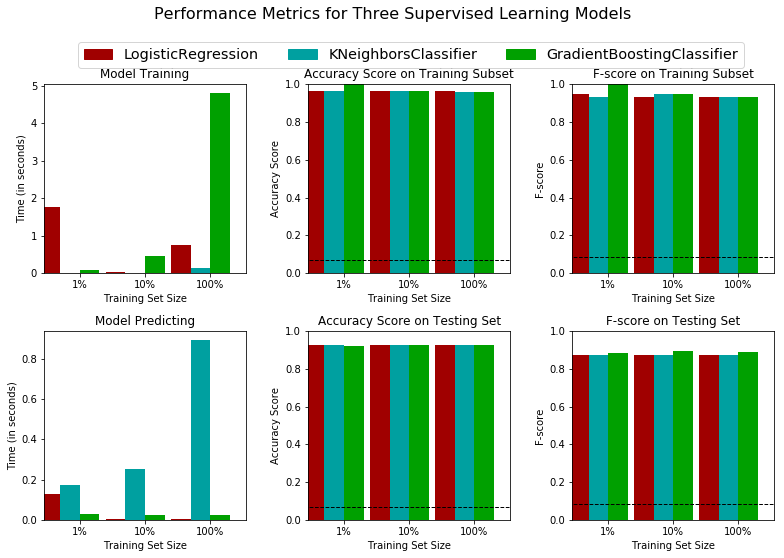

In [7]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the three models
clf_A = LogisticRegression(random_state=1)
clf_B = KNeighborsClassifier()
clf_C = GradientBoostingClassifier(random_state=1)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = round(samples_100 * 0.1)
samples_1 = round(samples_100 * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [8]:
# Import 'make_scorer', and any other necessary libraries
from sklearn.metrics import make_scorer

# Initialize the classifier
clf = GradientBoostingClassifier(random_state=1)

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 3, 4, 5], 'max_depth': [3, 4, 5]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)

# Report the before-and-afterscores
print("Optimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))

Optimized model
------
Accuracy score on testing data: 0.9285
F-score on testing data: 0.1828


In [40]:
test_df = pd.read_csv('criminal_test.csv')
test_df

corr_data_test = test_df.corr(method='pearson', min_periods=1)

actual_row_test = []

for row in corr_data_test:
    if corr_data_test['VEREP'][row] > 0:
        actual_row_test.append(row)
        
actual_data_test = test_df[actual_row_test]

actual_data_test

predictions = clf_C.predict(actual_data_test)

output=pd.DataFrame()
output['PERID']=test_df['PERID']
output['Criminal']=predictions
output.to_csv('criminal-predictions.csv', index = False)